In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(7,7)})

In [54]:
class KMeans:
    def __init__(self,k):
        self.k=k
        
    def __distance(self,x,y):
        return (x[0]-y[0])**2 + (x[1]-y[1])**2
    
    def fit(self,points,centroids):
        prev_clusters=None
        clusters=[set() for i in range(self.k)]
        
        while prev_clusters != clusters:
            prev_clusters=clusters
            print(prev_clusters)
            for p in points:
                idx=0
                for i in range(1,self.k):
                    if self.__distance(p,centroids[i])<self.__distance(p,centroids[idx]):
                        idx=i
                clusters[idx].add(p)
                
            print(centroids)
            for i in range(self.k):
                centroids[i]=np.mean(list(clusters[i]),axis=0)
                
            print(centroids)
                
        return clusters,centroids


In [55]:
points = [
          (0.1, 0.6),
          (0.15, 0.71),
          (0.08,0.9),
          (0.16, 0.85),
          (0.2,0.3),
          (0.25,0.5),
          (0.24,0.1),
          (0.3,0.2)
]

In [56]:
raw_df = pd.DataFrame()
x = [p[0] for p in points]
y = [p[1] for p in points]
raw_df['x'] = x
raw_df['y'] = y
raw_df

,x,y
0,0.10,0.60
1,0.15,0.71
2,0.08,0.90
3,0.16,0.85
4,0.20,0.30
5,0.25,0.50
6,0.24,0.10
7,0.30,0.20


<AxesSubplot:xlabel='x', ylabel='y'>

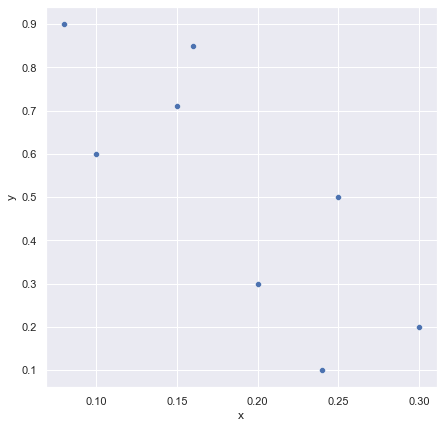

In [62]:
sns.scatterplot(data = raw_df,x='x',y='y')

In [58]:
model =KMeans(2)

In [59]:
clusters, centroids = model.fit(points, centroids = [(0.1, 0.6),(0.3,0.2)])

[set(), set()]
[(0.1, 0.6), (0.3, 0.2)]
[array([0.148, 0.712]), array([0.24666667, 0.2       ])]


In [60]:
clustered_df = pd.DataFrame()
x=[]
y=[]
category=[]
for i in range(len(clusters)):
    for p in clusters[i]:
        x.append(p[0])
        y.append(p[1])
        category.append(f'{i}')

for c in centroids:
    x.append(c[0])
    y.append(c[1])
    category.append('Centroid')

clustered_df['x']=x
clustered_df['y']=y
clustered_df['category']=category
clustered_df


,x,y,category
0,0.150000,0.710,0
1,0.250000,0.500,0
2,0.100000,0.600,0
3,0.160000,0.850,0
4,0.080000,0.900,0
5,0.240000,0.100,1
6,0.200000,0.300,1
7,0.300000,0.200,1
8,0.148000,0.712,Centroid
9,0.246667,0.200,Centroid


<AxesSubplot:xlabel='x', ylabel='y'>

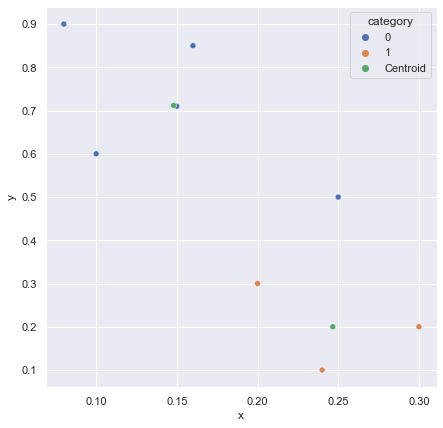

In [61]:
sns.scatterplot(data=clustered_df,x='x',y='y',hue='category')